In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("train.csv", index_col=[0])
df_test = pd.read_csv("test.csv", index_col = [0])

In [5]:
#chect feature data type
df_train.dtypes

surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
outcome                   object
dtype: object

In [6]:
#check train data for Nan
df_train.isna().sum()

surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
outcome                  0
dtype: int64

In [7]:
#check test data for NAn
df_test.isna().sum()

surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64

In [8]:
#check distribution of target values
df_train.outcome.value_counts()

lived         574
died          410
euthanized    251
Name: outcome, dtype: int64

In [9]:
#get numeric and string features
numerical_columns = df_train.drop("hospital_number", axis = 1).select_dtypes(include = np.number).columns.tolist()
string_columns = df_train.drop("outcome", axis = 1).select_dtypes(include = object).columns.tolist()

In [10]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [11]:
label_encoder = LabelEncoder()

In [12]:
label_encoder.fit(df_train["outcome"])

LabelEncoder()

In [13]:
print(label_encoder.classes_)

['died' 'euthanized' 'lived']


In [14]:
#Label encode the target variable
df_train["outcome"] = label_encoder.transform(df_train["outcome"])

In [15]:
label_encoder.inverse_transform([0,1,2])

array(['died', 'euthanized', 'lived'], dtype=object)

In [16]:
#OneHot encode string variables for both trainand test data
df_train_encoded = pd.get_dummies(df_train[string_columns])
df_test_encoded  = pd.get_dummies(df_test[string_columns])

In [17]:
df_test_encoded.shape

(824, 69)

In [18]:
# merge with the data frames and drop the corresponding string data
df_train = df_train.join(df_train_encoded).drop(string_columns, axis = 1)
df_test = df_test.join(df_test_encoded).drop(string_columns, axis = 1)

In [19]:
#find missing features in test data
feature_difference = list(set(df_train.drop("outcome", axis = 1)) - set(df_test))

In [21]:
#set the missing feature values to nan
df_feature_difference = pd.DataFrame(data=np.nan, index= df_test.index, columns=list(feature_difference))

In [22]:
# and join with the test data
df_test = df_test.join(df_feature_difference)

In [23]:
df_test[feature_difference] = df_test[feature_difference].fillna(0)

In [24]:
features = df_train.drop("outcome",axis=1).columns.tolist()

In [25]:
#make sure the order of the features in the test data is the same with the train data
df_test = df_test[features]

In [26]:
df_test.head()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,...,abdomen_normal,abdomen_other,abdomo_appearance_None,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_no,surgical_lesion_yes,cp_data_no,cp_data_yes
id,,,,,,,,,,,,,,,,,,,,,
1235,534053,38.6,40.0,20.0,7.0,42.0,7.5,2.3,0,0,...,0,0,0,1,0,0,1,0,1,0
1236,528469,38.2,112.0,48.0,3.5,44.0,6.0,2.6,2208,0,...,0,0,0,0,0,1,1,0,0,1
1237,528178,37.7,66.0,12.0,3.0,31.5,6.0,1.6,2205,0,...,0,0,0,0,1,0,0,1,0,1
1238,534784,37.1,88.0,20.0,2.0,75.0,81.0,1.0,1400,0,...,0,0,1,0,0,0,0,1,1,0
1239,529840,38.3,50.0,12.0,3.0,37.0,6.8,2.6,2208,0,...,0,0,0,0,1,0,0,1,0,1


In [28]:
#check for strongly correlated numerical feature
df_train[numerical_columns].corr()

,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
rectal_temp,1.000000,0.176761,0.124377,0.115980,0.088986,-0.060842,0.043342,0.021711,-0.022823,-0.005220
pulse,0.176761,1.000000,0.395130,-0.010132,0.435102,0.004373,0.056391,0.000037,0.021804,0.028273
respiratory_rate,0.124377,0.395130,1.000000,0.003854,0.188777,0.004018,0.004287,0.020502,-0.010536,0.009663
nasogastric_reflux_ph,0.115980,-0.010132,0.003854,1.000000,-0.101066,-0.583299,0.433006,0.052951,-0.029683,-0.024594
packed_cell_volume,0.088986,0.435102,0.188777,-0.101066,1.000000,0.176178,-0.059655,-0.083784,0.050659,0.051235
total_protein,-0.060842,0.004373,0.004018,-0.583299,0.176178,1.000000,-0.469784,-0.105598,0.044565,0.020635
abdomo_protein,0.043342,0.056391,0.004287,0.433006,-0.059655,-0.469784,1.000000,0.050051,0.002571,-0.022588
lesion_1,0.021711,0.000037,0.020502,0.052951,-0.083784,-0.105598,0.050051,1.000000,-0.007595,0.002761
lesion_2,-0.022823,0.021804,-0.010536,-0.029683,0.050659,0.044565,0.002571,-0.007595,1.000000,0.644054
lesion_3,-0.005220,0.028273,0.009663,-0.024594,0.051235,0.020635,-0.022588,0.002761,0.644054,1.000000


In [29]:
#extract the features and target, also drop hospital number

X, y = df_train.drop(["hospital_number","outcome"], axis =1), df_train["outcome"]
X_test  = df_test.drop("hospital_number", axis = 1)

In [30]:
#import an appropriate classifier
import xgboost as xgb

In [60]:
#Use l2 regularization to reduce underfiting
model = xgb.XGBClassifier(objective="multi:softmax",
                          num_class = 3,
                          n_estimators = 200,
                          eval_metric = ["mlogloss"],
                          early_stopping_rounds = 10,
                          reg_lambda = 1000)

In [61]:
#ectract some validation data from the train data
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state =0)

In [63]:
#fit the model
model.fit(X_train, y_train,
          eval_set = [(X_train,y_train), (X_val, y_val)]
         )

[0]	validation_0-mlogloss:1.07972	validation_1-mlogloss:1.08062
[1]	validation_0-mlogloss:1.06196	validation_1-mlogloss:1.06370
[2]	validation_0-mlogloss:1.04520	validation_1-mlogloss:1.04775
[3]	validation_0-mlogloss:1.02946	validation_1-mlogloss:1.03280
[4]	validation_0-mlogloss:1.01471	validation_1-mlogloss:1.01897
[5]	validation_0-mlogloss:1.00067	validation_1-mlogloss:1.00619
[6]	validation_0-mlogloss:0.98745	validation_1-mlogloss:0.99400
[7]	validation_0-mlogloss:0.97493	validation_1-mlogloss:0.98265
[8]	validation_0-mlogloss:0.96307	validation_1-mlogloss:0.97206
[9]	validation_0-mlogloss:0.95141	validation_1-mlogloss:0.96102
[10]	validation_0-mlogloss:0.94090	validation_1-mlogloss:0.95158
[11]	validation_0-mlogloss:0.93035	validation_1-mlogloss:0.94255
[12]	validation_0-mlogloss:0.92023	validation_1-mlogloss:0.93344
[13]	validation_0-mlogloss:0.91114	validation_1-mlogloss:0.92551
[14]	validation_0-mlogloss:0.90183	validation_1-mlogloss:0.91719
[15]	validation_0-mlogloss:0.89367	

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=['mlogloss'],
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_class=3, num_parallel_tree=None, ...)

In [64]:
#check model performance
eval_result = model.evals_result()    

In [65]:
training_rounds = range(len(eval_result["validation_0"]["mlogloss"]))

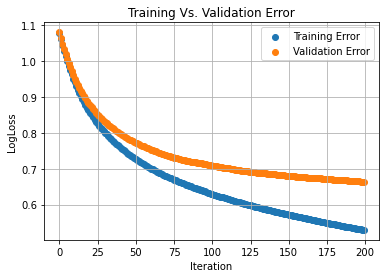

In [66]:
plt.scatter(x=training_rounds, y = eval_result["validation_0"]["mlogloss"], label = "Training Error")
plt.scatter(x=training_rounds, y = eval_result["validation_1"]["mlogloss"], label = "Validation Error")
plt.grid(True)
plt.xlabel("Iteration")
plt.ylabel("LogLoss")
plt.title("Training Vs. Validation Error")
plt.legend()
plt.show()


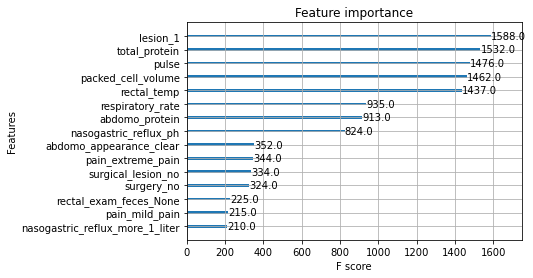

In [67]:
#check import features
xgb.plot_importance(model, max_num_features=15)
plt.show()

In [68]:
from sklearn.metrics import classification_report

In [69]:
y_pred = model.predict(X_val)

In [70]:
report = classification_report(y_val, y_pred, target_names = ["died","euthanized","lived"])

In [71]:
print(report)

              precision    recall  f1-score   support

        died       0.70      0.77      0.73       130
  euthanized       0.79      0.63      0.70        70
       lived       0.76      0.76      0.76       171

    accuracy                           0.74       371
   macro avg       0.75      0.72      0.73       371
weighted avg       0.74      0.74      0.74       371



In [78]:
#return the predicted value
y_test = label_encoder.inverse_transform(model.predict(X_test))